In [31]:
import pandas as pd

life_expectancy_df =  pd.read_csv(r'C:\Users\LENOVO\Desktop\Machine learning\Linear Regression\Life Expectancy Data.csv')
print(life_expectancy_df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [32]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Why this is a regression problem?

First you have to analysis the data before using the algorithm. Here the dependant variable(y) is life expectancy column which
are continuous numeric values. This is a mutiple linear regression problem because one y, mutiple x's

In [33]:
# converting my data into dummy data
life_expectancy_df = pd.get_dummies(life_expectancy_df, drop_first=True).astype(float)
print(life_expectancy_df)

        Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           62.0     0.01   
1     2014.0              59.9            271.0           64.0     0.01   
2     2013.0              59.9            268.0           66.0     0.01   
3     2012.0              59.5            272.0           69.0     0.01   
4     2011.0              59.2            275.0           71.0     0.01   
...      ...               ...              ...            ...      ...   
2933  2004.0              44.3            723.0           27.0     4.36   
2934  2003.0              44.5            715.0           26.0     4.06   
2935  2002.0              44.8             73.0           25.0     4.43   
2936  2001.0              45.3            686.0           25.0     1.72   
2937  2000.0              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         

In [34]:
life_expectancy_df.isnull().sum() # checking for null columns

Year                   0
Life expectancy       10
Adult Mortality       10
infant deaths          0
Alcohol              194
                    ... 
Country_Viet Nam       0
Country_Yemen          0
Country_Zambia         0
Country_Zimbabwe       0
Status_Developing      0
Length: 213, dtype: int64

In [35]:
life_expectancy_df[life_expectancy_df.isnull().any(axis=1)] #checking columns with nulls, axis=1 means colums

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
32,2015.0,75.6,19.0,21.0,NaN,0.000000,95.0,63.0,59.5,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44,2003.0,71.7,146.0,20.0,0.34,25.018523,NaN,15374.0,47.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45,2002.0,71.6,145.0,20.0,0.36,148.511984,NaN,5862.0,46.1,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46,2001.0,71.4,145.0,20.0,0.23,147.986071,NaN,2686.0,45.3,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47,2000.0,71.3,145.0,21.0,0.25,154.455944,NaN,0.0,44.4,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2003.0,46.4,64.0,39.0,2.33,65.789974,NaN,881.0,17.6,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2919,2002.0,45.5,69.0,41.0,2.44,54.043480,NaN,25036.0,17.3,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2920,2001.0,44.6,611.0,43.0,2.61,46.830275,NaN,16997.0,17.1,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2921,2000.0,43.8,614.0,44.0,2.62,45.616880,NaN,30930.0,16.8,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [36]:
# filtering numeric columns which has nulls
numeric_columns = [i for i in life_expectancy_df.columns if life_expectancy_df[i].dtype in ['int64', 'float64'] and life_expectancy_df[i].isnull().sum() != 0]
numeric_columns

['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [37]:
# replacing null with mean
for i in numeric_columns:
    mean_val = life_expectancy_df[i].mean()
    life_expectancy_df[i] = life_expectancy_df[i].fillna(mean_val)

life_expectancy_df.isnull().sum()

Year                 0
Life expectancy      0
Adult Mortality      0
infant deaths        0
Alcohol              0
                    ..
Country_Viet Nam     0
Country_Yemen        0
Country_Zambia       0
Country_Zimbabwe     0
Status_Developing    0
Length: 213, dtype: int64

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

x_constant = sm.add_constant(life_expectancy_df).astype(float) # this will add constant column

# priting vif table to check multicollinearity

# trying it inside try and expect for exception handling
try:
    vif_data = pd.DataFrame()
    vif_data['Features'] = x_constant.columns 
    vif_data['data'] = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
    print(vif_data)
    
except Exception as e:
    print(vif_data)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


              Features          data
0                const  0.000000e+00
1                 Year  2.380072e+00
2     Life expectancy   2.780133e+01
3      Adult Mortality  2.608194e+00
4        infant deaths  1.460988e+03
..                 ...           ...
209   Country_Viet Nam  2.605449e+00
210      Country_Yemen  2.135202e+00
211     Country_Zambia  2.518653e+00
212   Country_Zimbabwe  2.928537e+00
213  Status_Developing  3.002400e+15

[214 rows x 2 columns]


In [39]:
# removing space from values inside Features column
vif_data['Features'] = vif_data['Features'].str.strip()

In [40]:
# filtering columns which has vif over 10 expect life expectancy because I will delete those columns
vif_data[(vif_data['data'] > 10) & (vif_data['Features'] != 'Life expectancy')]['Features']

4                                          infant deaths
10                                     under-five deaths
17                                  thinness  1-19 years
18                                    thinness 5-9 years
20                                             Schooling
27                                     Country_Australia
28                                       Country_Austria
35                                       Country_Belgium
44                                      Country_Bulgaria
60                                       Country_Croatia
62                                        Country_Cyprus
63                                       Country_Czechia
67                                       Country_Denmark
84                                       Country_Germany
94                                       Country_Hungary
95                                       Country_Iceland
96                                         Country_India
100                            

In [41]:
life_expectancy_df.columns = life_expectancy_df.columns.str.strip() # removing space from the main dataset

In [42]:
# dropping columns where vif is above 10
col_to_drop = vif_data[(vif_data['data'] > 10) & (vif_data['Features'] != 'Life expectancy')]['Features']
life_expectancy_df = life_expectancy_df.drop(col_to_drop, axis=1)
print(life_expectancy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 174 entries, Year to Country_Zimbabwe
dtypes: float64(174)
memory usage: 3.9 MB
None


In [43]:
# checking vif again to see if i removed vif columns over 10
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

x_constant = sm.add_constant(life_expectancy_df).astype(float) # this will add constant column

# priting vif table to check multicollinearity

try:
    vif_data = pd.DataFrame()
    vif_data['Features'] = x_constant.columns 
    vif_data['data'] = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
    print(vif_data)
    
except Exception as e:
    print(vif_data)

                                       Features           data
0                                         const  289305.466808
1                                          Year       1.592511
2                               Life expectancy      14.145240
3                               Adult Mortality       2.565558
4                                       Alcohol       4.264810
..                                          ...            ...
170  Country_Venezuela (Bolivarian Republic of)       1.071564
171                            Country_Viet Nam       1.127502
172                               Country_Yemen       1.273801
173                              Country_Zambia       1.509923
174                            Country_Zimbabwe       1.884993

[175 rows x 2 columns]


In [44]:
(vif_data['data'] > 10) & (~vif_data['Features'].isin(['const', 'Life expectancy'])) # '~' is not in, in pandas

0      False
1      False
2      False
3      False
4      False
       ...  
170    False
171    False
172    False
173    False
174    False
Length: 175, dtype: bool

In [45]:
# now for the vif over 5, I will check how strong is their relationship with life expectancy columns,
# Those columns which doesnt share a strong relation with life expectancy column, I will drop those
vif_data[vif_data['data'] > 5]

,Features,data
0,const,289305.466808
2,Life expectancy,14.145240
5,percentage expenditure,6.717263
12,HIV/AIDS,5.141520
13,GDP,7.632303


In [46]:
life_expectancy_df.shape[1]

174

In [47]:
# find columns which has strong relatiomn with Life expectancy                     
life_expectancy_df.corr()['Life expectancy'].sort_values(ascending=False)

Life expectancy                     1.000000
Income composition of resources     0.692483
BMI                                 0.559255
Diphtheria                          0.475418
Polio                               0.461574
                                      ...   
Country_Lesotho                    -0.159140
Country_Central African Republic   -0.161232
Country_Sierra Leone               -0.179915
HIV/AIDS                           -0.556457
Adult Mortality                    -0.696359
Name: Life expectancy, Length: 174, dtype: float64

In [48]:
'percentage expenditure' in life_expectancy_df.columns

True

In [49]:
life_expectancy_df['percentage expenditure'].dtype

dtype('float64')

In [50]:
life_expectancy_df['percentage expenditure'].corr(life_expectancy_df['Life expectancy'])

np.float64(0.38179117320643075)

In [51]:
life_expectancy_df['GDP'].corr(life_expectancy_df['Life expectancy'])

np.float64(0.43049301854946426)

In [52]:
# dropping those columns which doesnt share string corr with dependant variable and has vif over 5
life_expectancy_df = life_expectancy_df.drop(['GDP', 'percentage expenditure', 'HIV/AIDS'], axis=1)

In [53]:
for i in ['GDP', 'percentage expenditure', 'HIV/AIDS']:
    if i in life_expectancy_df:
        print(i)
    else:
        print('not found')

not found
not found
not found


In [54]:
# seperating dependant and independant variables

x = life_expectancy_df.drop('Life expectancy', axis=1) # this will have all columns except life expectancy
y  = life_expectancy_df['Life expectancy'] # dependant variable

In [55]:
'Life expectancy' in x.columns

False

In [56]:
# I will split the data into 70% training 30 % testing 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

        Year  Adult Mortality  Alcohol  Hepatitis B  Measles   BMI  Polio  \
1641  2008.0             64.0     7.14    86.000000      1.0  66.6   72.0   
618   2005.0            394.0     2.03    80.940461    146.0  21.7   62.0   
406   2009.0            283.0     4.55    92.000000  54118.0  16.1   91.0   
1094  2011.0            289.0     3.57    86.000000      0.0  23.7   85.0   
1788  2007.0            217.0     0.26    85.000000   1088.0  17.6   84.0   
...      ...              ...      ...          ...      ...   ...    ...   
1638  2011.0             59.0     6.91    82.000000      3.0  68.0   96.0   
1095  2010.0            287.0     3.21    83.000000     26.0  23.1   82.0   
1130  2007.0            266.0     6.08    80.940461      0.0   4.7   62.0   
1294  2003.0             72.0     9.30    95.000000  10982.0  57.0   97.0   
860   2005.0             34.0     1.07    96.000000     19.0  13.9   96.0   

      Total expenditure  Diphtheria    Population  ...  \
1641             

In [57]:
# training the regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
# lets check can it predit well or not

y_predict = model.predict(x_test)

In [63]:
# checking r2, mae, rmse, mse

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print('R² is:', r2_score(y_test, y_predict))
print('Mean squared error:', mean_squared_error(y_test, y_predict))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error:', mean_absolute_error(y_test, y_predict))

R² is: 0.9222959799218005
Mean squared error: 7.261530478546097
Root mean squared error: 2.6947227090270527
Mean absolute error: 1.8054136146649014


In [64]:
# Adjusted R square = 1 - (1-R2) * (N-1) / N - p -1 

n = x_train.shape[0] + x_test.shape[0]  # n is total data/rows
p = x_train.shape[1]  # p is total indepedent variable

Adjusted_R_square = 1 - (1- r2_score(y_test, y_predict)) * (n - 1) / (n - p - 1)
print(Adjusted_R_square)

0.9175219707373791


In [65]:
import pandas as pd

difference = pd.DataFrame({'Predicted Values':y_predict, 'Actual Values':y_test})
difference.head(15)

,Predicted Values,Actual Values
2546,70.259307,73.7
650,78.049519,75.9
1740,74.824789,74.2
177,78.208541,76.8
1377,54.061510,51.9
535,49.132034,49.6
2371,66.783391,67.4
2014,73.330278,73.9
321,79.756887,77.2
2493,50.500087,55.0


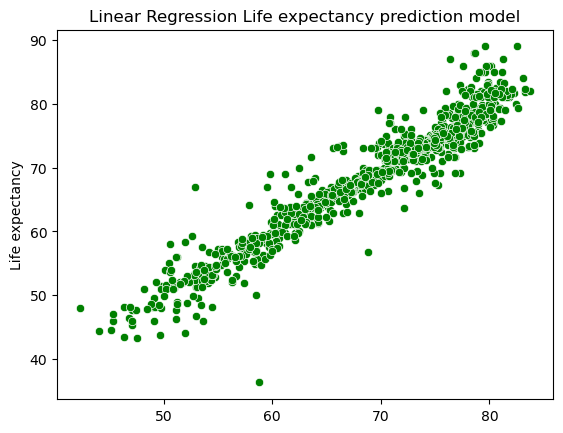

In [66]:
#plotting the data to check if its forming a good best fit line
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=y_predict, y=y_test, color='green') 
plt.title('Linear Regression Life expectancy prediction model')
plt.show()

So we can check all values are close to the best fit line, so my regression model is accurate.